# Leaf Disease Detection Model

In [15]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

In [16]:
#Loading Data
#train_data
train_data = pd.read_csv("train_data.csv")
train_data.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_1109_JPG.rf.c085cca696ee85d4a648d110f49d96...,640,640,Early_Blight,265,399,286,408
1,IMG_1109_JPG.rf.c085cca696ee85d4a648d110f49d96...,640,640,Target_Spot,347,408,361,420
2,IMG_1109_JPG.rf.c085cca696ee85d4a648d110f49d96...,640,640,black spot,375,375,380,379
3,IMG_0341_JPG.rf.c3919908e292ba159085e6e0cc3ec9...,640,640,Late_blight,454,403,491,435
4,IMG_0341_JPG.rf.c3919908e292ba159085e6e0cc3ec9...,640,640,Late_blight,260,399,480,575


In [17]:
#test_data
test_data = pd.read_csv("test_data.csv")
test_data.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_1023_JPG.rf.6b85b647b5fc7f392b8b304c4c0f34...,640,640,Healthy,31,42,571,606
1,IMG_0233_JPG.rf.b27c3e2dd843cab5e0f652fd1ce565...,640,640,Early_Blight,324,191,349,207
2,IMG_0233_JPG.rf.b27c3e2dd843cab5e0f652fd1ce565...,640,640,Early_Blight,284,276,312,297
3,IMG_0233_JPG.rf.b27c3e2dd843cab5e0f652fd1ce565...,640,640,black spot,246,286,265,301
4,IMG_0233_JPG.rf.b27c3e2dd843cab5e0f652fd1ce565...,640,640,Early_Blight,141,238,182,260


In [18]:
#valid_data
valid_data = pd.read_csv("valid_data.csv")
valid_data.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_1113_JPG.rf.083cde7627a164f8daa1e4cced1c11...,640,640,Healthy,86,48,618,612
1,IMG_0298_JPG.rf.084b8d28ed173d8b73f2218748798a...,640,640,Late_blight,227,267,286,310
2,IMG_0298_JPG.rf.084b8d28ed173d8b73f2218748798a...,640,640,Late_blight,492,321,511,342
3,IMG_0298_JPG.rf.084b8d28ed173d8b73f2218748798a...,640,640,black spot,183,179,200,191
4,IMG_0298_JPG.rf.084b8d28ed173d8b73f2218748798a...,640,640,black spot,257,358,267,366


In [19]:
#step-2: 
#Pre-processing
#checking for null entries
print("Total null entries in the train datasheet:", train_data.isnull().sum().sum())
print("\nTotal null entries in the test datasheet:", test_data.isnull().sum().sum())
print("\nTotal null entries in the valid datasheet:", valid_data.isnull().sum().sum())

Total null entries in the train datasheet: 0

Total null entries in the test datasheet: 0

Total null entries in the valid datasheet: 0


In [20]:
#no missing values or it's already preprocessed

#converting class labels to numerical values
label_encoder = LabelEncoder()
train_data['class'] = label_encoder.fit_transform(train_data['class'])
test_data['class'] = label_encoder.transform(test_data['class'])
valid_data['class'] = label_encoder.transform(valid_data['class'])

print("Training data :\n",train_data.head(),"\n\nTest data :\n", test_data.head(),"\n\n valid data :\n",valid_data.head() )

Training data :
                                             filename  width  height  class  \
0  IMG_1109_JPG.rf.c085cca696ee85d4a648d110f49d96...    640     640      1   
1  IMG_1109_JPG.rf.c085cca696ee85d4a648d110f49d96...    640     640      5   
2  IMG_1109_JPG.rf.c085cca696ee85d4a648d110f49d96...    640     640      6   
3  IMG_0341_JPG.rf.c3919908e292ba159085e6e0cc3ec9...    640     640      3   
4  IMG_0341_JPG.rf.c3919908e292ba159085e6e0cc3ec9...    640     640      3   

   xmin  ymin  xmax  ymax  
0   265   399   286   408  
1   347   408   361   420  
2   375   375   380   379  
3   454   403   491   435  
4   260   399   480   575   

Test data :
                                             filename  width  height  class  \
0  IMG_1023_JPG.rf.6b85b647b5fc7f392b8b304c4c0f34...    640     640      2   
1  IMG_0233_JPG.rf.b27c3e2dd843cab5e0f652fd1ce565...    640     640      1   
2  IMG_0233_JPG.rf.b27c3e2dd843cab5e0f652fd1ce565...    640     640      1   
3  IMG_0233_JPG.rf.

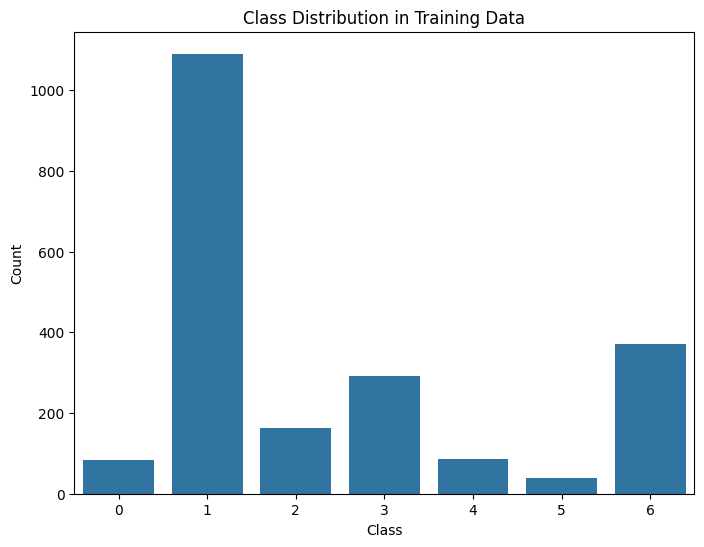

In [21]:
#step 3: EDA
#checking class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=train_data)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [22]:
#step 4: Feature Engineering
# Calculate width and height ratios
train_data['width_ratio'] = train_data['width'] / (train_data['xmax'] - train_data['xmin'])
train_data['height_ratio'] = train_data['height'] / (train_data['ymax'] - train_data['ymin'])

test_data['width_ratio'] = test_data['width'] / (test_data['xmax'] - test_data['xmin'])
test_data['height_ratio'] = test_data['height'] / (test_data['ymax'] - test_data['ymin'])

In [23]:
#Model Building (multiple model) 
# Define features and target variable
X_train = train_data[['width', 'height', 'xmin', 'ymin', 'xmax', 'ymax', 'width_ratio', 'height_ratio']]
y_train = train_data['class']
X_test = test_data[['width', 'height', 'xmin', 'ymin', 'xmax', 'ymax', 'width_ratio', 'height_ratio']]
y_test = test_data['class']

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Initialize and train the Support Vector Machine model
svm_model = SVC(kernel='linear',C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [24]:
# Step 6: Model Evaluation/Hyper tuning
# Evaluate Random Forest model on test data
#model-1 :random forest
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Model  :\n")
print("Accuracy : ", rf_accuracy)
# Generate confusion matrix for Random Forest model
print("\nconfusion matrix :\n",confusion_matrix(y_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_test, 
rf_y_pred, zero_division=1))

Random Forest Model  :

Accuracy :  0.7983193277310925

confusion matrix :
 [[ 1  1  0  0  0  0  0]
 [ 0 60  0  2  1  0  3]
 [ 0  0  7  0  0  0  0]
 [ 0  5  0 13  0  0  2]
 [ 0  1  0  1  3  0  1]
 [ 0  0  0  0  0  4  0]
 [ 1  6  0  0  0  0  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.82      0.91      0.86        66
           2       1.00      1.00      1.00         7
           3       0.81      0.65      0.72        20
           4       0.75      0.50      0.60         6
           5       1.00      1.00      1.00         4
           6       0.54      0.50      0.52        14

    accuracy                           0.80       119
   macro avg       0.77      0.72      0.74       119
weighted avg       0.79      0.80      0.79       119



In [25]:
#model-2 SVM
# Evaluate Support Vector Machine model on test data
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Support Vector Machine Model :\n")
print("\nAccuracy:", svm_accuracy)

#confusion matrix
print("\nconfusion matrix :\n",confusion_matrix(y_test, svm_y_pred))
print("\nClassification Report:\n", classification_report(y_test, 
svm_y_pred, zero_division=1))

Support Vector Machine Model :


Accuracy: 0.6134453781512605

confusion matrix :
 [[ 0  2  0  0  0  0  0]
 [ 0 63  0  2  0  0  1]
 [ 0  0  7  0  0  0  0]
 [ 0 16  1  3  0  0  0]
 [ 0  5  0  1  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0 14  0  0  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.61      0.95      0.74        66
           2       0.88      1.00      0.93         7
           3       0.50      0.15      0.23        20
           4       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         4
           6       0.00      0.00      0.00        14

    accuracy                           0.61       119
   macro avg       0.71      0.30      0.27       119
weighted avg       0.57      0.61      0.50       119



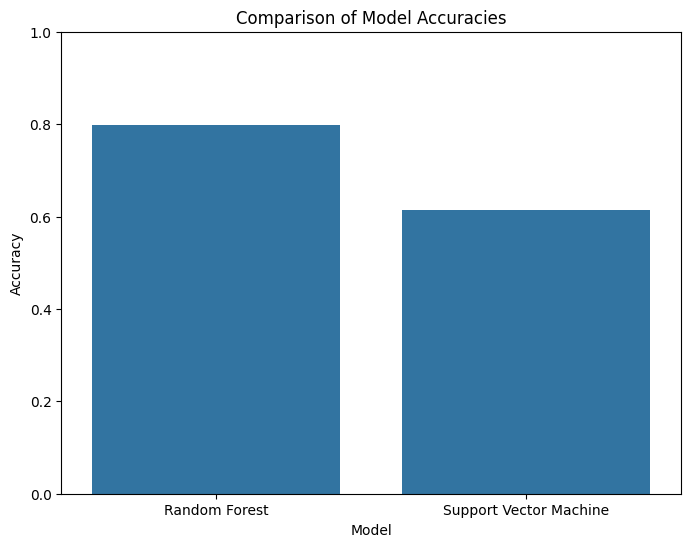

In [26]:
# Step 9: Result Comparison
# Plotting a graph to compare the accuracies of the two models
models = ['Random Forest', 'Support Vector Machine']
accuracies = [rf_accuracy, svm_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization of accuracy values
plt.show()

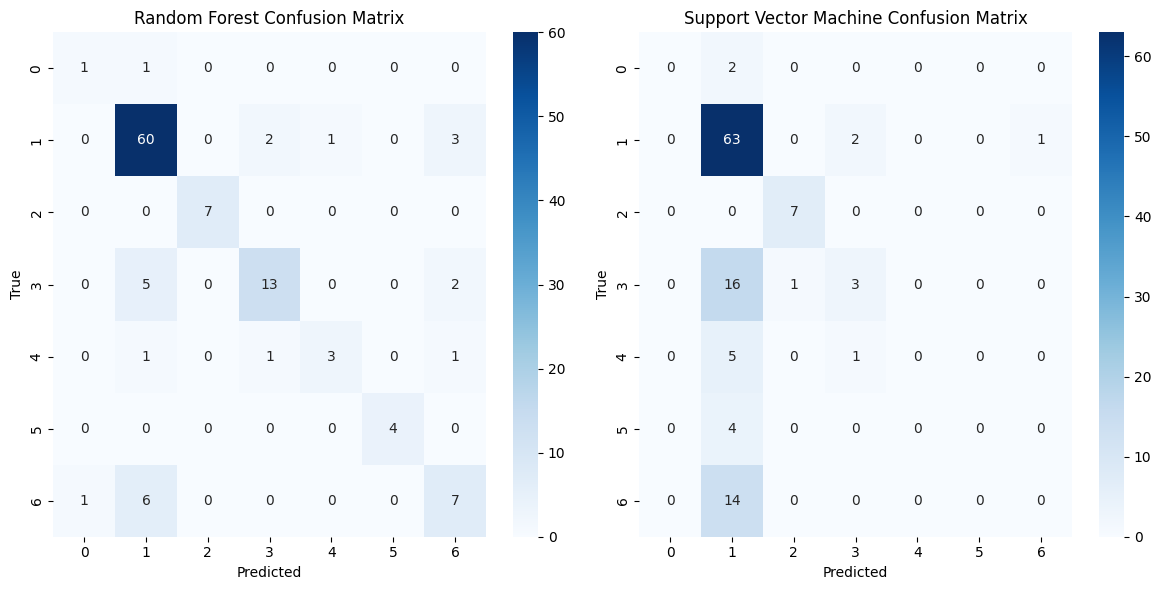

In [27]:
# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, svm_y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [29]:
#Step 8: Conclusion
print("Two models were built for tomato leaf diseases detection")
print("\nAccuracy rates :\n")
print("Random Forest Model : ", rf_accuracy)
print("Support Vector Machine : ", svm_accuracy)
print("\nConfusion Matrix : \n")
print("Random Forest Model:")
print(confusion_matrix(y_test, rf_y_pred))
print("\nSupport Vector Machine Model:")
print(confusion_matrix(y_test, svm_y_pred))

Two models were built for tomato leaf diseases detection

Accuracy rates :

Random Forest Model :  0.7983193277310925
Support Vector Machine :  0.6134453781512605

Confusion Matrix : 

Random Forest Model:
[[ 1  1  0  0  0  0  0]
 [ 0 60  0  2  1  0  3]
 [ 0  0  7  0  0  0  0]
 [ 0  5  0 13  0  0  2]
 [ 0  1  0  1  3  0  1]
 [ 0  0  0  0  0  4  0]
 [ 1  6  0  0  0  0  7]]

Support Vector Machine Model:
[[ 0  2  0  0  0  0  0]
 [ 0 63  0  2  0  0  1]
 [ 0  0  7  0  0  0  0]
 [ 0 16  1  3  0  0  0]
 [ 0  5  0  1  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0 14  0  0  0  0  0]]
